<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Neural_Network_Quality_Classification_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [61]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing Dataset

In [63]:
df = pd.read_csv('ex2data2.txt',header=None)

In [64]:
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [65]:
df = df.rename(columns={0 :'Test1',1:'Test2',2:'Result'})

In [66]:
df.head()

,Test1,Test2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [67]:
x = df[['Test1','Test2']].to_numpy()

In [68]:
y = df['Result'].to_numpy().reshape(-1,1)

## Data Visualization

Text(0.5, 1.0, 'Result Distribution')

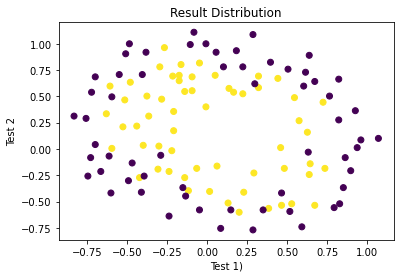

In [69]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Test 1)')
plt.ylabel('Test 2')
plt.title('Result Distribution')

## Neural Network

In [70]:
class Model(nn.Module):

  def __init__(self,in_features=2,h1=8,h2=9,out_features=2):
    # how many layers?
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

   
    
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [71]:
model = Model()

In [72]:
model

Model(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=2, bias=True)
)

In [73]:
X_train = torch.FloatTensor(x)

In [74]:
y_train = torch.LongTensor(y).reshape(-1)

In [75]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

## Training

In [ ]:
epochs = 10000
losses = []

for i in range(epochs):

  # forward and get a prediction
  y_pred = model.forward(X_train)
  # calculate loss/error
  loss = criterion(y_pred,y_train)
  losses.append(loss)
  if i%10==0:
    print('Epoch: {} and Loss: {}'.format(i,loss))
  #Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

## Result

Text(0.5, 0, 'Epoch')

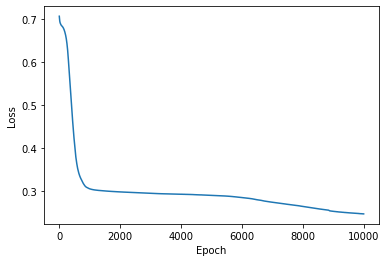

In [77]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Decision Boundary

In [82]:
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.naive_bayes import GaussianNB 
import matplotlib.gridspec as gridspec

In [79]:
clf3 = GaussianNB()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


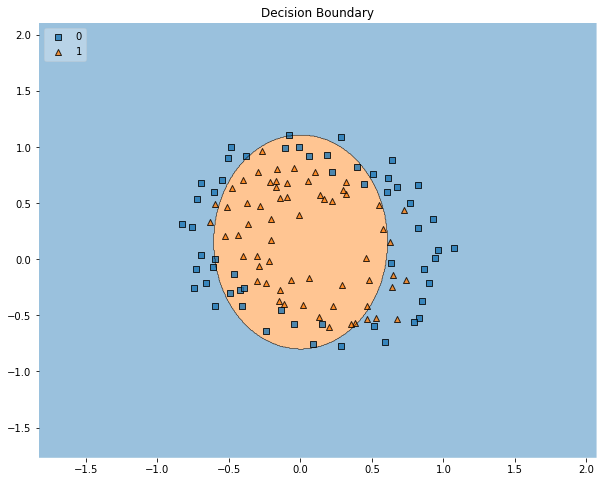

In [106]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

clf3.fit(X_train.detach().numpy(), y_d.detach().numpy())

fig = plot_decision_regions(X=X_train.detach().numpy(), y=y_d.detach().numpy(), clf=clf3, legend=2)
plt.title('Decision Boundary')

plt.show()